According to [Howard Johnson](https://m.eet.com/media/1140355/19806-89618.pdf):

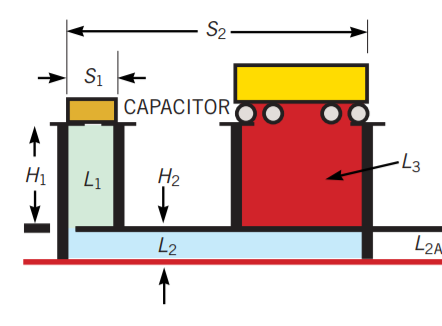

\begin{eqnarray}
\mu_0 & = & 4\pi 10^{-7} \tfrac{H}{m} \\
L_2 & = & \frac{\mu_0}{\pi} H_2 \mathrm{ln}\frac{2S_2}{D} \\
L_1 & = & \frac{\mu_0}{2\pi} H_1\!^2 \left(\frac{2}{D} - \frac{1}{S_1}\right)
\end{eqnarray}

* [Stackup info](https://www.elecrow.com/download/Elecrow%204%20layer%20PCB%20stock.pdf)
* [TDK](https://product.tdk.com/info/tvcl/ecm/mlcc_commercial_general_c0402_ecm.pdf) 1005 MLCC has 0.28nF inductance

In [70]:
import math

Lcap = 0.28e-9

mu0 = 4*math.pi * 1e-7
def L2():
    return mu0/math.pi * h2 * math.log(2*s2/d)
def L1():
    return mu0/(2*math.pi) * h1**2 * (2/d - 1/s1)
def display_impedance():
    impedance = L1() + L2() + Lcap
    print("via drill %(d).2fmm, %(pcb).2fmm PCB, total impedance = %(impedance).2fnH" % {
        'd': d/1e-3,
        'pcb': (h2 + 0.5e-3)/1e-3,
        'impedance': (impedance)/1e-9
    })
    return impedance

In [72]:
h1 = 195e-6
h2 = 500e-6
s1 = 0.5e-3
s2 = 2e-3
d=0.3e-3
display_impedance();

via drill 0.30mm, 1.00mm PCB, total impedance = 0.83nH


In [74]:
d=0.4e-3
Ltotal = display_impedance();

via drill 0.40mm, 1.00mm PCB, total impedance = 0.76nH


In [75]:
d=0.3e-3
h2 = 1.100e-3
display_impedance();

via drill 0.30mm, 1.60mm PCB, total impedance = 1.46nH


In [76]:
d=0.4e-3
display_impedance();

via drill 0.40mm, 1.60mm PCB, total impedance = 1.32nH


# Inductance requirements of DDR3

\begin{eqnarray}
I_{ac} & = & C \frac{\mathrm{d}V}{\mathrm{d}t} \\
SR_{se} = \frac{\mathrm{d}V}{\mathrm{d}t} & = & 5\tfrac{V}{ns} & \text{(max)} \\
C & = & 5.0\,\mathrm{pF} + 2.5\,\mathrm{pF} & \text{(25mm trace len)} \\
t_{sr,se} & = & \frac{0.2 V_{DDQ}}{SR_{se}} \\
L_{max} & = & \frac{V_{drop}\mathrm{d}t}{N\mathrm{d}i}
\end{eqnarray}

In [92]:
sr = 2e9

In [105]:
i_ac = 7.5e-12 * sr; i_ac

0.015

In [106]:
t_sr = 0.2*1.4 / sr; t_sr
#t_sr = 450e-12

1.3999999999999998e-10

In [112]:
Nsignal = (16+4)/2

In [113]:
l_max = 0.1 * t_sr / (Nsignal * i_ac)
print("%0.3fnH" % (l_max/1e-9))

0.093nH


In [114]:
Ncap = Ltotal / l_max; Ncap

8.178557342130102